<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Bonus%20Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 8.6 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [32]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [33]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [34]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values


In [35]:
# # Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# # Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

# Feature engineering with cubic

In [120]:
X_scaled, y = make_regression(n_samples=166, n_features=6, noise=0.1, random_state=42)

In [148]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
poly.fit(X_scaled)  # Fit PolynomialFeatures on X
X_poly = poly.transform(X_scaled)  # Transform X to polynomial features


In [149]:
model = LinearRegression()
model.fit(X_poly, y)  # Fit LinearRegression on X_poly and y

LinearRegression()

In [150]:
y_pred = model.predict(X_poly)

In [151]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)


print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 Score: 0.9999993294440388
Mean Squared Error: 0.00818547188151728
Mean Absolute Error: 0.06989137141778336


In [152]:
from sklearn.model_selection import learning_curve

In [153]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_poly, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

In [154]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

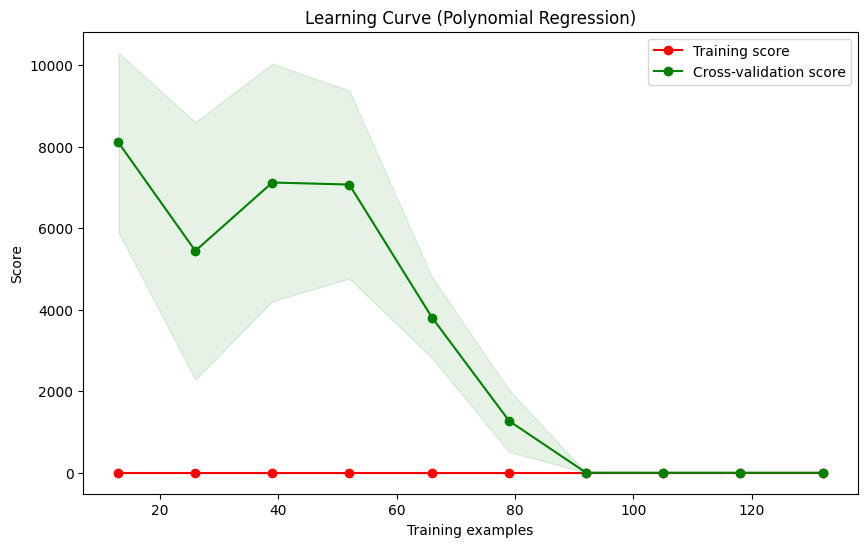

In [143]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Polynomial Regression)")
plt.show()






# Recursive feature elimination (RFE)


In [155]:
from sklearn.feature_selection import RFE


In [156]:
rfe = RFE(model, n_features_to_select=3)


In [157]:
# 拟合RFE以选择特征
rfe.fit(X_poly, y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [159]:
# 打印选定的特征
print("Selected features based on RFE:")
print(rfe.support_)
print("Ranking of features:")
print(rfe.ranking_)

Selected features based on RFE:
[ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Ranking of features:
[ 1  1  1  3  2  4  7 22 11 10  5 24 13  8 20 14 25 21  9  6 15 17 19 18
 12 23 16]


# Random Forest

In [165]:
from sklearn.ensemble import RandomForestRegressor


In [170]:
X_scaled, y = make_regression(n_samples=166, n_features=6, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [173]:
rf_model = RandomForestRegressor(random_state=42)

In [174]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [175]:
y_pred = rf_model.predict(X_test)


In [176]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R^2 Score: 0.6954780043758623
Mean Squared Error (MSE): 3472.39883533389
Mean Absolute Error (MAE): 40.82948045926513
